In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
from lsst.sims.featureScheduler.schedulers import Core_scheduler
from lsst.sims.featureScheduler.utils import standard_goals, calc_norm_factor
import lsst.sims.featureScheduler.basis_functions as bf
from lsst.sims.featureScheduler.surveys import (generate_dd_surveys, Greedy_survey,
                                                Blob_survey)
%matplotlib inline
from lsst.sims.utils import hpid2RaDec
from alt_sched import altfootprint

In [2]:
nside=32
target_map = altfootprint(dec_min=-90, dec_max=20)

In [3]:
tm_summ = target_map['g']*0
for tm in target_map:
    tm_summ += target_map[tm]

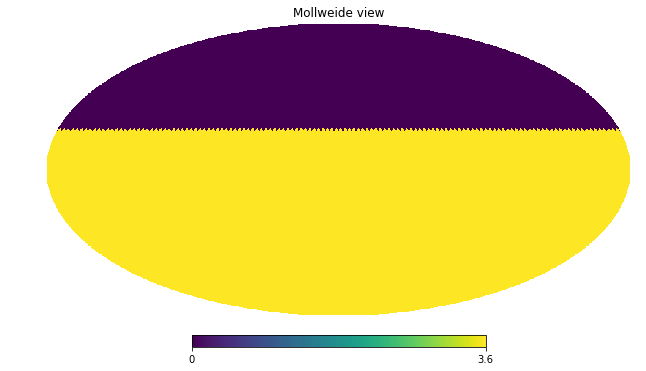

In [4]:
hp.mollview(tm_summ)

In [5]:
# ok, this isnlt going to be perfect because of the unequal distribution above of dec=0, but let's try
tm_a = np.cumsum(tm_summ)

In [6]:
sections = 2
sum_per_sec = np.max(tm_a)/sections
sum_vals = np.arange(sections+1)*sum_per_sec

In [7]:
hpids = []
for val in sum_vals:
    good = np.where(tm_a <= val)[0]
    hpids.append( np.max(good))
    

In [8]:
hpids

[4031, 8158, 12287]

In [9]:
ra, dec = hpid2RaDec(nside, hpids)

In [10]:
dec

array([ 20.74237995, -19.47122063, -88.53802884])